In [7]:
wine <- read.csv('winequality-white.csv',sep = ";")


In [8]:
nrow(wine)

[1] 6497

In [9]:
head(wine)

fixed.acidity.volatile.acidity.citric.acid.residual.sugar.chlorides.free.sulfur.dioxide.total.sulfur.dioxide.density.pH.sulphates.alcohol.quality.Class
"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1"
"7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1"
"7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1"
"11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1"
"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1"
"7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1"


## Data Exploration

In [10]:
library(reshape2)
head(melt(wine))

Using fixed.acidity.volatile.acidity.citric.acid.residual.sugar.chlorides.free.sulfur.dioxide.total.sulfur.dioxide.density.pH.sulphates.alcohol.quality.Class as id variables


fixed.acidity.volatile.acidity.citric.acid.residual.sugar.chlorides.free.sulfur.dioxide.total.sulfur.dioxide.density.pH.sulphates.alcohol.quality.Class
"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1"
"7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1"
"7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1"
"11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1"
"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1"
"7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1"


Using fixed.acidity.volatile.acidity.citric.acid.residual.sugar.chlorides.free.sulfur.dioxide.total.sulfur.dioxide.density.pH.sulphates.alcohol.quality.Class as id variables


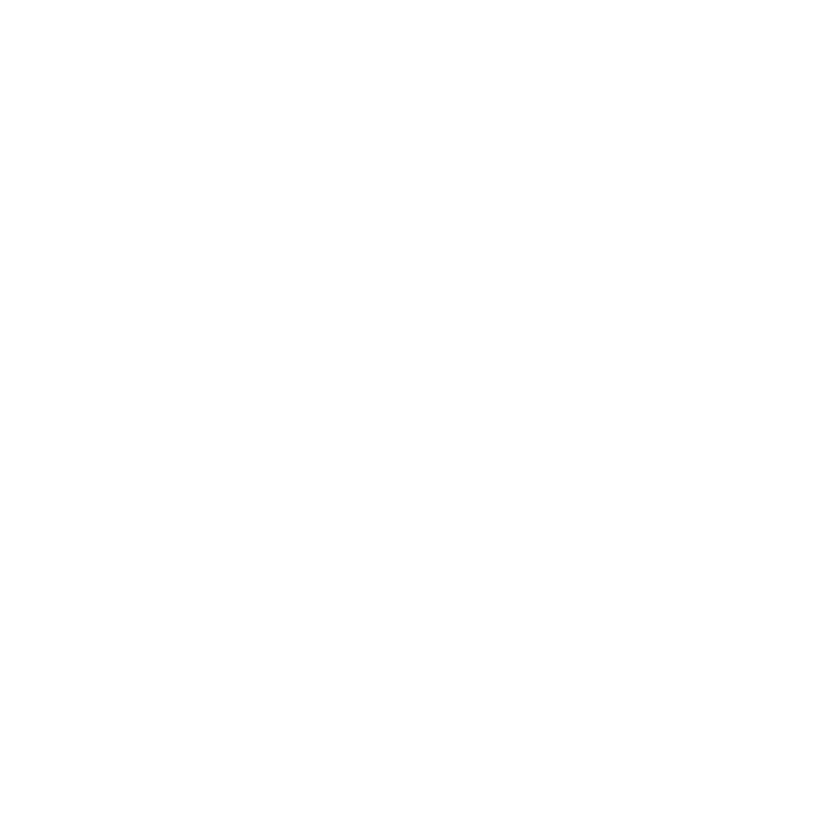

In [11]:
library(ggplot2)
ggplot(data = melt(wine), mapping = aes(x = value)) + 
    geom_histogram(bins = 10) + facet_wrap(~variable, scales = 'free_x')

## Data Preparation

In [12]:
wine$taste <- ifelse(wine$quality < 6, 'bad', 'good')
wine$taste[wine$quality == 6] <- 'normal'
wine$taste <- as.factor(wine$taste)

ERROR: Error in `$<-.data.frame`(`*tmp*`, "taste", value = logical(0)): replacement has 0 rows, data has 6497


In [ ]:
table(wine$taste)


In [ ]:
set.seed(123)
samp <- sample(nrow(wine), 0.6 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]

nrow(train)
nrow(test)

In [ ]:
head(train)

In [ ]:
head(test)
nrow(test)

In [ ]:
# Classification Tree with rpart
library(rpart)

 # grow tree 
simpletree <- rpart(taste ~ . - quality, data = train,method="class")

In [ ]:
simpletree

In [ ]:
#Plot tree using rpart.plot
library("rpart.plot")
rpart.plot(simpletree)

In [ ]:
tastePrediction <- predict(simpletree, test[, colnames(wine)], type="class")


In [ ]:
head(tastePrediction)

### Confusion Matrix Examples

In [ ]:
xtab <- table(tastePrediction, test$taste)
xtab

In [ ]:
## Using caret package
library(caret)
confusionMatrix(xtab)

## Ensemble Models - Build a RandomForest Model

In [ ]:
library(randomForest)
model <- randomForest(taste ~ . - quality, data = train)

In [ ]:
model